<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Problem-1" data-toc-modified-id="-Problem-1-1"><font color="blue"> Problem 1</font></a></span><ul class="toc-item"><li><span><a href="#-Part-1:-" data-toc-modified-id="-Part-1:--1.1"><b> Part 1: </b></a></span></li><li><span><a href="#-Part-2:-" data-toc-modified-id="-Part-2:--1.2"><b> Part 2: </b></a></span></li><li><span><a href="#-Part-3:-" data-toc-modified-id="-Part-3:--1.3"><b> Part 3: </b></a></span></li></ul></li><li><span><a href="#-Problem-2" data-toc-modified-id="-Problem-2-2"><font color="blue"> Problem 2</font></a></span><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-2.1">Part 1</a></span></li><li><span><a href="#Part-2:" data-toc-modified-id="Part-2:-2.2">Part 2:</a></span></li><li><span><a href="#Part-3:-(refer-to-R-notebook)" data-toc-modified-id="Part-3:-(refer-to-R-notebook)-2.3">Part 3: (refer to R notebook)</a></span></li><li><span><a href="#Part-4" data-toc-modified-id="Part-4-2.4">Part 4</a></span></li></ul></li></ul></div>

### <font color = blue> Problem 1

#### <B> Part 1: </B>

Generate a random variable X that has 10,000 random uniform numbers from 1 to N, where N can be any number of your choosing greater than or equal to 6.  Then generate a random variable Y that has 10,000 random normal numbers with a mean of u = o = (N+1)/2.  

In [1]:
#Random variable X
from random import randint  #randint draws from a uniform distribution
import sys
import warnings
warnings.filterwarnings('ignore')

X = []

N = 10000
for r in range(0, N):
    value = randint(6,sys.maxsize)  #from 6 to infinity
    X.append(value)

#print(X)

In [2]:
from random import gauss

Y = []

sample_std_dev = (N + 1)/2
sample_mean = sample_std_dev

for r in range(0, N):
    value = gauss(sample_mean,sample_std_dev)    #first parameter is the mean and second is std dev
    Y.append(value)

#print(Y)

Calculate as a minimum the below probabilities a through c.  Assume the small letter "x" is estimated as the median of the X variable, and the small letter "y" is estimated as the 1st quartile of the Y variable.  Interpret the meaning of all probabilities.

a.   P(X>x | X>y)  
b.  P(X>x, Y>y)  
c.  P(X<x | X>y)  

In [3]:
#Calculate x and y
import statistics as stat

x = round(stat.median(X),2)
y = stat.quantiles(Y, method='inclusive')

print(f'x is ', x)
print(f'y is ', round(y[0],2))

x is  4.6080885567288576e+18
y is  1633.56


In [4]:
#a. P(X>x | X>y)  

# formula is: P(X>x and X>y)  /   P(X>y)

#let A = P(X>x)
A = [a > x for a in X]
A = A.count(True)/len(A)
print(f'A is', A)

#Let B = P(X>y)
B = [b > y[0] for b in X] 
B = B.count(True)/len(B)
print(f'B is ', B)

answer = (A * B)/B
print(f'answer to 1a is ', answer)

A is 0.5
B is  1.0
answer to 1a is  0.5


In [5]:
#b. P(X>x, Y>y)   
#means what is the probability of X>x and Y>y, so multiply these two probabilities

#Let C = P(Y>y)
C = [c > y[0] for c in Y]
C = C.count(True)/len(C)
print(f'C is ', C)

answer = A * C
print(f'answer to 1b is ', answer)

C is  0.75
answer to 1b is  0.375


In [6]:
#c. P(X<x | X>y) 
# means what is the probability of X<x given that X>y

#Let D = P(X < x)
D = [d < x for d in X]
D = D.count(True)/len(D)
print(f'D is ', D)

#P(D and B)/P(B)
answer = (D*B)/B
print(f'answer to 1c is ', answer)

D is  0.5
answer to 1c is  0.5


#### <B> Part 2: </B>

Investigate whether P(X>x and Y>y)=P(X>x)P(Y>y) by building a table and evaluating the marginal and joint probabilities.


In [7]:
#build the table
import numpy as np
import pandas as pd 

ar=np.array([[(0.75*0.5), (0.75*0.5)],[(0.25*0.5),(0.25*0.5)]])    
df=pd.DataFrame(ar, columns=['X_gt_x', 'X_lt_x'])
df.index=['Y_gt_y', 'Y_lt_y'] 

df2=df.copy()
df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,X_gt_x,X_lt_x,Row_Total
Y_gt_y,0.375,0.375,0.75
Y_lt_y,0.125,0.125,0.25
Column_Total,0.500,0.500,1.00


<I>Joint probability </I> is P(X>x and Y>y) which is 0.375 (row 1, col 1). <br>
<I>Marginal probability </I> is P(X>x)P(Y>y) which is (0.375 (row 1, col 1) + 0.125 (row 2, col1)) = 0.5 <br>
The two are not equal.

#### <B> Part 3: </B>

Check to see if independence holds by using Fisher’s Exact Test and the Chi Square Test.  What is the difference between the two? Which is most appropriate?

H0: X and Y are independent <br>
H1: X and Y are dependent

In [8]:
#Fisher's Exact Test
import scipy.stats as stats

v1 = df.iloc[0,0]
v2 = df.iloc[0,1]
v3 = df.iloc[1,0]
v4 = df.iloc[1,1]

oddsratio, pvalue = stats.fisher_exact([[v1,v2],[v3,v4]])
                                         
if pvalue < 0.05:
    print(f'The p-value is', pvalue, 'so we accept H1 and conclude X and Y appear to be dependent.')
else:
    print(f'The p-value is', pvalue, 'so we can retain H0 and conclude X and Y appear to be independent.')

The p-value is 1.0 so we can retain H0 and conclude X and Y appear to be independent.


In [9]:
#Chi-Square Test
chi1, p_value, degrees_freedom, expected_array = stats.chi2_contingency([[v1,v2],[v3,v4]])

if pvalue < 0.05:
    print(f'The p-value is', pvalue, 'so we accept H1 and conclude X and Y appear to be dependent.')
else:
    print(f'The p-value is', pvalue, 'so we can retain H0 and conclude X and Y appear to be independent.')

The p-value is 1.0 so we can retain H0 and conclude X and Y appear to be independent.


<B> What is the difference between the two? </B> <I> Chi-Square </I> applies an approximation by assuming the observed frequencies match the expected frequencies, while <I> Fisher's Exact </I> uses an "exact" procedure for it's calculations. 

<B> Which is most appropriate? </B> Both are good tests, but Fisher's is often preferred because it uses an exact distribution of the actual data to calculate the p-value, while Chi Square uses an approximation of the true distribution.  This article on ["Fisher's Exact Test"](https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593) does a great job explaining this.

### <font color = blue> Problem 2

In [10]:
#Get the data for Problem 2
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows', None)

data = pd.read_csv(r'house-prices-advanced-regression-techniques\train.csv')

#### Part 1

1. Provide univariate descriptive statistics and appropriate plots for the training data set.   
2. Provide a scatterplot matrix for at least two of the independent variables and the dependent variable. 
3. Derive a correlation matrix for any three quantitative variables in the dataset.  
4. Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval.
5. Discuss the meaning of your analysis.  Would you be worried about familywise error? Why or why not?

In [11]:
#1 Provide univariate descriptive statistics and appropriate plots for the training data set
data.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


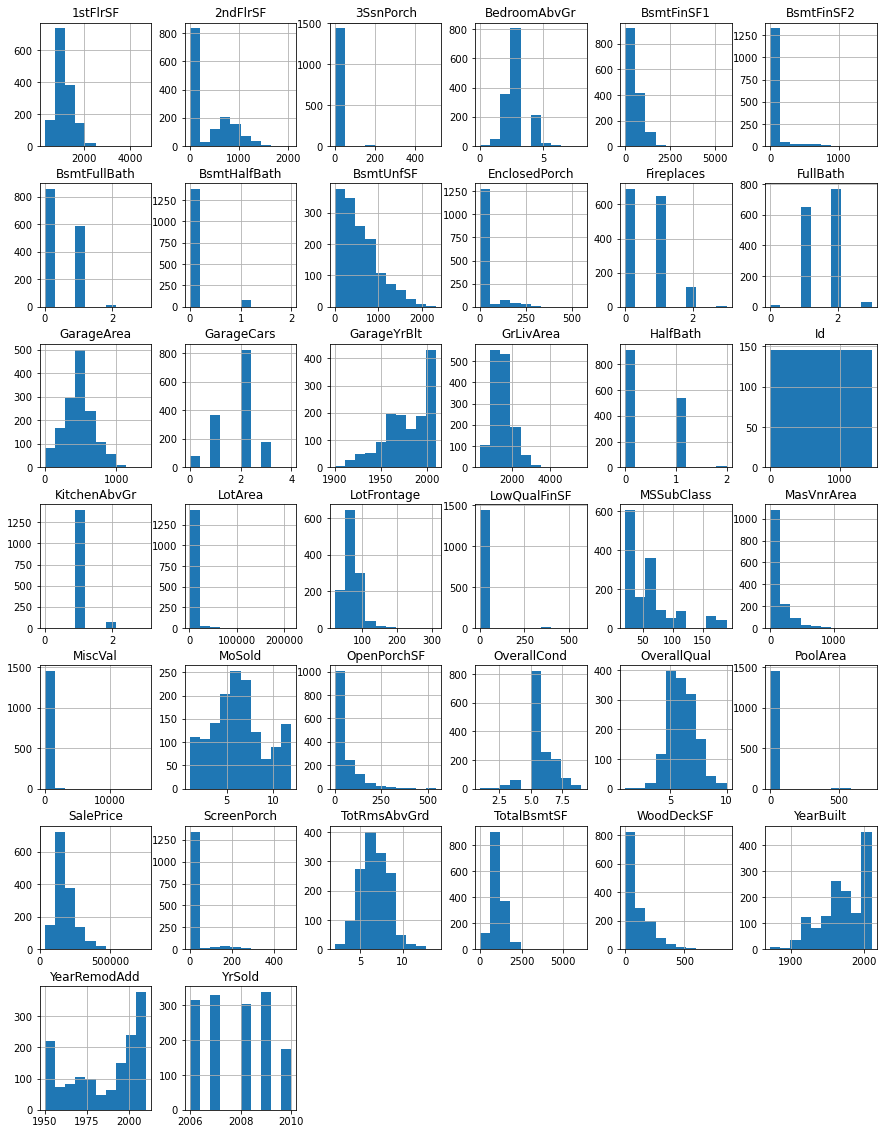

In [13]:
#Histograms for the features
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

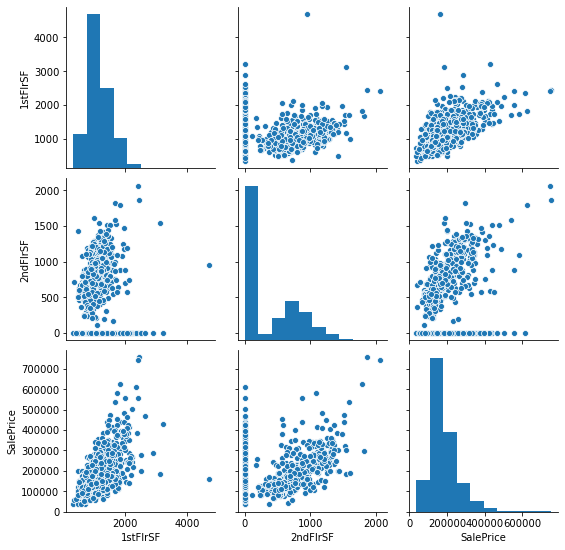

In [14]:
#2. Provide a scatterplot matrix for at least two of the independent variables and the dependent variable.
import seaborn as sns

pairplot_data = data[['1stFlrSF','2ndFlrSF','SalePrice']]

sns.pairplot(pairplot_data)
plt.show()

In [15]:
#3. Derive a correlation matrix for any three quantitative variables in the dataset.

In [16]:
cormat_data = data[['1stFlrSF','2ndFlrSF','LotFrontage']]

col_names = ['first','second','lot']
cormat_data.columns = col_names

cormatrix = cormat_data.corr()
cormatrix

,first,second,lot
first,1.000000,-0.202646,0.457181
second,-0.202646,1.000000,0.080177
lot,0.457181,0.080177,1.000000


In [17]:
#4. Test the hypotheses that the correlations between each pairwise set of variables is 0 and provide an 80% confidence interval.

#H0: pairwise correlations (first,second), (first, lot), (second, lot) = 0
#H1: pairwise correlations != 0

#The matrix generated correlations, but using pearsonr provides both correlations and p-values
from scipy.stats import pearsonr

cormat_data_nonulls = cormat_data.dropna()
cormat_array = cormat_data_nonulls.to_numpy()

array_first = cormat_array[:,0]
array_second = cormat_array[:,1]
array_lot = cormat_array[:,2]

#FIRST, SECOND
corr, p = pearsonr(array_first,array_second)

array_combined = array_first - array_second
std_combined = np.std(array_combined)

N = np.sqrt(len(array_combined))
SE = std_combined/N
SE = SE/(std_combined)

cfl = 1.282 #Zvalue for 80% confidence interval
confidence_value = cfl * SE
confidence_lower = round(corr - confidence_value,2)
confidence_upper = round(corr + confidence_value,2)

print('FIRST PAIRWISE (1stFlrSF and 2ndFlrSF)')
print(f'Correlation is ', round(corr,2), 'p value is ', round(p,2))
if p > 0.20:
    print('No correlation, so fail to reject H0')
else:
    print('Some correlation, so reject H0')

print(f'Confidence interval: ', confidence_lower, ' < ', round(corr,2), ' < ', confidence_upper)
print()

#FIRST, LOT
corr, p = pearsonr(array_first,array_lot)

array_combined = array_first - array_lot
std_combined = np.std(array_combined)

N = np.sqrt(len(array_combined))
SE = std_combined/N
SE = SE/(std_combined)

cfl = 1.282 #Zvalue for 80% confidence interval
confidence_value = cfl * SE
confidence_lower = round(corr - confidence_value,2)
confidence_upper = round(corr + confidence_value,2)

print('SECOND PAIRWISE (1stFlrSF and LotFrontage)')
print(f'Correlation is ', round(corr,2), 'p value is ', round(p,2))
if p > 0.20:
    print('No correlation, so fail to reject H0')
else:
    print('Some correlation, so reject H0')

print(f'Confidence interval: ', confidence_lower, ' < ', round(corr,2), ' < ', confidence_upper)
print()

#SECOND, LOT
corr, p = pearsonr(array_second,array_lot)

array_combined = array_second - array_lot
std_combined = np.std(array_combined)

N = np.sqrt(len(array_combined))
SE = std_combined/N
SE = SE/(std_combined)

cfl = 1.282 #Zvalue for 80% confidence interval
confidence_value = cfl * SE
confidence_lower = round(corr - confidence_value,2)
confidence_upper = round(corr + confidence_value,2)

print('THIRD PAIRWISE (2ndFlrSF and LotFrontage)')
print(f'Correlation is ', round(corr,2), 'p value is ', round(p,2))
if p > 0.20:
    print('No correlation, so fail to reject H0')
else:
    print('Some correlation, so reject H0')

print(f'Confidence interval: ', confidence_lower, ' < ', round(corr,2), ' < ', confidence_upper)
print()

FIRST PAIRWISE (1stFlrSF and 2ndFlrSF)
Correlation is  -0.19 p value is  0.0
Some correlation, so reject H0
Confidence interval:  -0.23  <  -0.19  <  -0.15

SECOND PAIRWISE (1stFlrSF and LotFrontage)
Correlation is  0.46 p value is  0.0
Some correlation, so reject H0
Confidence interval:  0.42  <  0.46  <  0.49

THIRD PAIRWISE (2ndFlrSF and LotFrontage)
Correlation is  0.08 p value is  0.01
Some correlation, so reject H0
Confidence interval:  0.04  <  0.08  <  0.12



5. <I> Discuss the meaning of your analysis: </I>  Given the features I selected, it aligns with my expectations that there is correlation between all three pairs.  I find it interesting that there is a negative correlation between 1st and 2nd floor square footage.  I was anticipating that in general a home with larger 1st floor square footage would tend to positively correlate to have more second floor square footage.  The low correlation (8%) between 2nd floor footage and lot frontage makes sense to me given the negative correlation that I just mentioned between 1st and 2nd floor square footage.

<I> Would you be worried about familywise error? Why or why not? </I> Family wise error is making one or more false discoveries.  Per my prior comments about the p-values, familywise error appears to me to be a valid concern.

#### Part 2:

<I> Linear Algebra and Correlation </I>
1. Invert your correlation matrix from above. (This is known as the precision matrix and contains variance inflation factors on the diagonal.) 

2. Multiply the correlation matrix by the precision matrix, and then multiply the precision matrix by the correlation matrix. 

3. Conduct LU decomposition on the matrix.  

In [18]:
#1. Invert your correlation matrix from above
prematrix = np.linalg.inv(cormatrix)
prematrix

array([[ 1.36360589,  0.32842446, -0.64974689],
       [ 0.32842446,  1.08557101, -0.23718754],
       [-0.64974689, -0.23718754,  1.31606898]])

In [19]:
#2. Multiply the correlation matrix by the precision matrix, and then multiply the precision matrix by the correlation matrix.

#cor * pre
corpre_matrix = cormatrix * prematrix
corpre_matrix

,first,second,lot
first,1.363606,-0.066554,-0.297052
second,-0.066554,1.085571,-0.019017
lot,-0.297052,-0.019017,1.316069


In [20]:
#pre * cor
precor_matrix = prematrix * cormatrix
precor_matrix

,first,second,lot
first,1.363606,-0.066554,-0.297052
second,-0.066554,1.085571,-0.019017
lot,-0.297052,-0.019017,1.316069


In [21]:
#3. Conduct LU decomposition on the matrix.
from scipy.linalg import lu

precor_matrix_array = precor_matrix.to_numpy()

P, L, U = lu(precor_matrix_array)

print('P is:')
print(P)
print()

print('L is:')
print(L)
print()

print('U is:')
print(U)

P is:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

L is:
[[ 1.          0.          0.        ]
 [-0.04880733  1.          0.        ]
 [-0.21784295 -0.03096615  1.        ]]

U is:
[[ 1.36360589 -0.06655396 -0.29705193]
 [ 0.          1.08232269 -0.03351536]
 [ 0.          0.          1.25032047]]


#### Part 3: (refer to R notebook)

This problem requires use of R's MASS package, so this section was completed in an R notebook that was submitted in Blackboard along with this notebook.

#### Part 4

<I> Modeling </I>.  Build some type of multiple regression  model and submit your model to the competition board.  Provide your complete model summary and results with analysis.  Report your Kaggle.com user name and score.  

<I> Approach </I>
1. Count the NaN's in each feature and remove any feature that is over 20% NaN's
2. Convert the categorical variables from text to numbers, so they can be used in the model

3. Build a regression model function for use in steps 4 - 6.

4. Run the regression model using all the numeric features to get a baseline model
5. Pass each feature individually with the sale price to the model function, storing the results in a dataframe.
6. Incrementally build a series of models, adding features one at a time, starting with the highest R2 from the prior step until the multiple regression shows a declining R2

7. Run the model against the test dataset to create predictions to submit to the Kaggle competition

8. Summarize the results, including recommendations for further research on developing a multiple regression model

In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
#1. Count the NaN's in each feature and remove any feature that is over 20% NaN's
colnames = data.columns

nans_count_df = pd.DataFrame()

nans_count_list = []
nans_percent_list = []
for name in colnames:
    num_nans = data[name].isna().sum()
    nans_count_list.append(num_nans)
    
    percent_nans = (num_nans/len(data[name])) * 100
    nans_percent_list.append(percent_nans)

nans_count_df['colname'] = colnames
nans_count_df['nans_count'] = nans_count_list
nans_count_df['nans_percent'] = nans_percent_list

columns_to_keep = nans_count_df[nans_count_df.nans_percent < 20]
columns_removed = nans_count_df[nans_count_df.nans_percent >= 20]

columns_removed_list = columns_removed.colname.to_list()

data1 = data.drop(columns_removed_list, axis=1)

print(f'There are ',len(columns_removed), 'features with more than 20% NaN values.')
print(columns_removed.colname.to_list())

There are  5 features with more than 20% NaN values.
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [24]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
#2. Convert the categorical variables from text to numbers, so they can be used in the model
data2 = data1.copy()

step2_df = data2.select_dtypes(include=['object'])

colnames = step2_df.columns

#add the now numeric category columns to the dataframe
for name in colnames:
    new_column = name + '_code'
    
    data2[name] = data2[name].astype('category')
    
    data2[new_column] = data2[name].cat.codes

#drop the original text category columns
data2 = data2.drop(colnames,axis=1)

data2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_code,Street_code,LotShape_code,LandContour_code,Utilities_code,LotConfig_code,LandSlope_code,Neighborhood_code,Condition1_code,Condition2_code,BldgType_code,HouseStyle_code,RoofStyle_code,RoofMatl_code,Exterior1st_code,Exterior2nd_code,MasVnrType_code,ExterQual_code,ExterCond_code,Foundation_code,BsmtQual_code,BsmtCond_code,BsmtExposure_code,BsmtFinType1_code,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,GarageType_code,GarageFinish_code,GarageQual_code,GarageCond_code,PavedDrive_code,SaleType_code,SaleCondition_code
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [26]:
#Arrange the data frame so that SalePrice is the last column. Also, replace NaN values with the column mean.
columns_list = data2.columns
new_columns_list = [x for x in columns_list if x != 'SalePrice']
new_columns_list.append('SalePrice')

data3 = data2[new_columns_list]

#data3 = data3.dropna(axis=0, how='any')
lf_mean = data3.LotFrontage.mean()
mva_mean = data3.MasVnrArea.mean()
gyb_mean = data3.GarageYrBlt.mean()

data3['LotFrontage'] = data3.LotFrontage.fillna(lf_mean)
data3['MasVnrArea'] = data3.MasVnrArea.fillna(mva_mean)
data3['GarageYrBlt'] = data3.GarageYrBlt.fillna(gyb_mean)

In [27]:
#3. Build a regression model function for use in steps 4 - 6.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def run_model(X, Y):
    kfold = KFold(n_splits=10, random_state=7)
    model = LinearRegression()

    #scoring = 'neg_mean_squared_error'
    scoring = 'r2'

    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    return(results)

In [28]:
#4. Run the regression model using all the numeric features to get a baseline model
array = data3.values

X = array[:,0:75]
Y = array[:,75]

results = run_model(X, Y)

print('RESULTS FOR MODEL USING ALL THE FEATURES')
print(f'The R2 for each kfold is: ', results)
print()
print(f'The mean R2 is ', results.mean())

RESULTS FOR MODEL USING ALL THE FEATURES
The R2 for each kfold is:  [0.88776324 0.88226853 0.8984469  0.74690126 0.85633954 0.86252466
 0.83882317 0.85142584 0.50522175 0.88215553]

The mean R2 is  0.8211870425420772


In [29]:
#5. Pass each feature individually with the sale price to the model function, storing the results in a dataframe.
results_df = pd.DataFrame()

feature_name = []
feature_number = []
feature_R2MeanScore = []

for i in range(len(array[0])-1):
    X = array[:,i].reshape((-1, 1))
    Y = array[:,75]
    
    results = run_model(X, Y)
    
    feature_name.append(data3.columns[i])
    feature_number.append(i)
    feature_R2MeanScore.append(results.mean())

results_df['feature_name'] = feature_name
results_df['feature_number'] = feature_number
results_df['feature_R2MeanScore'] = feature_R2MeanScore

results_df = results_df.sort_values('feature_R2MeanScore', ascending=False).reset_index()
results_df = results_df.rename(columns={'index':'array_index'})

print('TOP 10 R2 SCORE FOR MODELS BUILT USING ONLY ONE FEATURE')
results_df.head(10)

TOP 10 R2 SCORE FOR MODELS BUILT USING ONLY ONE FEATURE


,array_index,feature_name,feature_number,feature_R2MeanScore
0,4,OverallQual,4,0.624112
1,16,GrLivArea,16,0.499674
2,26,GarageCars,26,0.405243
3,54,ExterQual_code,54,0.400842
4,27,GarageArea,27,0.385223
5,12,TotalBsmtSF,12,0.366755
6,13,1stFlrSF,13,0.350877
7,66,KitchenQual_code,66,0.336536
8,19,FullBath,19,0.311869
9,23,TotRmsAbvGrd,23,0.279461


In [30]:
#6a. Incrementally build a series of models, adding features one at a time, starting with the highest R2 from the prior step
#until the multiple regression shows a declining R2.

#Create a data4 dataframe that has features in the same order as the results_df dataframe
data4_columns = list(results_df.feature_name)
data4_columns.append('SalePrice')

data4 = data3[data4_columns]

array4 = data4.values

#Create the multiple regression model
multi_regression_df = pd.DataFrame()

new_feature_added = []
new_feature_array = []
R2MeanScore = []
incremental = []

for i in range(len(array4[0])-1):
    if i == 0:
        X = array4[:,i].reshape((-1, 1))
    else:
        X = array4[:,0:i]
    
    Y = array4[:,75]
    
    multi_results = run_model(X, Y)
    
    new_feature_added.append(data4.columns[i])
    new_feature_array.append(i)
    R2MeanScore.append(multi_results.mean())

    if i == 0:
        incremental.append(0)
    else:
        incremental_amt = multi_results.mean() - R2MeanScore[-2]
        incremental.append(incremental_amt)
    
multi_regression_df['new_feature_added'] = new_feature_added
multi_regression_df['new_feature_array'] = new_feature_array
multi_regression_df['R2MeanScore'] = R2MeanScore
multi_regression_df['incremental'] = incremental

#multi_regression_df = multi_regression_df.sort_values('R2MeanScore', ascending=False)
multi_regression_df = multi_regression_df.round(5)

print('TOP FEATURES FOR MULTI REGRESSION TRY #1')
multi_regression_df

TOP FEATURES FOR MULTI REGRESSION TRY #1


,new_feature_added,new_feature_array,R2MeanScore,incremental
0,OverallQual,0,0.62411,0.00000
1,GrLivArea,1,0.62411,0.00000
2,GarageCars,2,0.71394,0.08983
3,ExterQual_code,3,0.73819,0.02425
4,GarageArea,4,0.76054,0.02235
5,TotalBsmtSF,5,0.76136,0.00082
6,1stFlrSF,6,0.77339,0.01203
7,KitchenQual_code,7,0.77343,0.00004
8,FullBath,8,0.78171,0.00828
9,TotRmsAbvGrd,9,0.78097,-0.00074


In [31]:
#Create a data5 dataframe using the dataframe from step 6a
multi_regression_df2 = multi_regression_df[multi_regression_df.incremental > 0]

In [32]:
#6b Use the features with a positive incremental from model 6a and create a multi_regression model
data5_columns = list(multi_regression_df2.new_feature_added)
#data5_columns.append('SalePrice')

data5 = data4[data5_columns]

Xarray5 = data5.values
Yarray5 = data4.SalePrice.values.reshape((-1,1))

#Create the final multi regression model
#X = array5[:,0:40]
#Y = Yarray5[:,40]
X = Xarray5
Y = Yarray5

results = run_model(X, Y)

print('RESULTS FOR MODEL USING BEST FEATURES FROM PRIOR STEP')
print(f'The R2 for each kfold is: ', results)
print()
print(f'The mean R2 is ', results.mean())

RESULTS FOR MODEL USING BEST FEATURES FROM PRIOR STEP
The R2 for each kfold is:  [0.83020714 0.82245714 0.86156746 0.71324684 0.80259545 0.82577161
 0.8207818  0.77365234 0.49460627 0.8439653 ]

The mean R2 is  0.7788851348573145


In [33]:
#7a. Prepare test data to run predictions using the model
test_data = pd.read_csv(r'house-prices-advanced-regression-techniques\test.csv')

#Drop columns with too many Nan's
test_data = test_data.drop(columns_removed_list, axis=1)

#Add the now numeric category columns to the dataframe
colnames = step2_df.columns

for name in colnames:
    new_column = name + '_code'
    
    test_data[name] = test_data[name].astype('category')
    
    test_data[new_column] = test_data[name].cat.codes

#drop the original text category columns
test_data = test_data.drop(colnames,axis=1)

test_data = test_data[data5_columns[0:40]]

#test_data = test_data.dropna(axis=0, how='any')
lf_mean = test_data.LotFrontage.mean()
mva_mean = test_data.MasVnrArea.mean()
gyb_mean = test_data.GarageYrBlt.mean()
gc_mean = test_data.GarageCars.mean()
ga_mean = test_data.GarageArea.mean()
tbs_mean = test_data.TotalBsmtSF.mean()
bfb_mean = test_data.BsmtFullBath.mean()

test_data['LotFrontage'] = test_data.LotFrontage.fillna(lf_mean)
test_data['MasVnrArea'] = test_data.MasVnrArea.fillna(mva_mean)
test_data['GarageYrBlt'] = test_data.GarageYrBlt.fillna(gyb_mean)
test_data['GarageCars'] = test_data.GarageCars.fillna(gc_mean)
test_data['GarageArea'] = test_data.GarageArea.fillna(ga_mean)
test_data['TotalBsmtSF'] = test_data.TotalBsmtSF.fillna(tbs_mean)
test_data['BsmtFullBath'] = test_data.BsmtFullBath.fillna(bfb_mean)

In [34]:
#7b. Run the model against the test dataset to create predictions to submit to the Kaggle competition
#https://machinelearningmastery.com/make-predictions-scikit-learn/

# generate 2d classification dataset
#X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

test_data_array = test_data.values

# fit final model
#model = LogisticRegression()
model = LinearRegression()
model.fit(X, Y)

# new instances where we do not know the answer
#Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = test_data_array

# make a prediction
ynew = model.predict(Xnew)

# show the inputs and predicted outputs
#for i in range(len(Xnew)):
#    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))


In [35]:
#Create dataframe and download to csv to submit to Kaggle
kaggle_submission = pd.DataFrame()
kaggle_submission['Id'] = test_data.Id
kaggle_submission['SalePrice'] = list(ynew[:,0])

kaggle_submission.to_csv('kaggle_submission.csv', index=False)

<I> 8. Summary and Recommendations </I>

We started with 83 features and dropped 5 (Alley, FireplaceQu, PoolQC, Fence, and MiscFeature) because missing data was greater than 20%. Of the 78 remaining features, 38 were categorical so Panda's catcodes was used to convert these to numerical values. Finally, the approach to replace NaN values was to replace the NaN's with the mean of each feature.

The first model (step #4 above) was constructed using all 78 features and 1,121 rows.  Ten KFold validations were run on the training data and the R2 results ranged from a low of 50% to 89%, with a mean KFold R2 of 82%.  Achieving this high of an average R2 was surprising considering that the "curse of dimensionality" often comes into play when such a high number of features is used.

The second set of models (step #5) created a simple linear regression for each feature.  The Overall Quality, GrLivingArea, and GarageCars  have the highest R2 scores.  The top 10 can be viewed in step #5 above.

In step 6a, a multiple regression model was built by iteratively adding features.  The results revealed what features were the biggest contributors towards the R2 value of 82%. Of interest is that OverallQual and GrLivingArea have an R2 of 62%, then including GarageCars jumps the R2 up 9% to 71%.  From there the incremental improvement of the other features drops drastically to 1% or less. 

For step 6b, I selected the features from step 6a that had a positive incremental improvement on the model. The results were disappointing, as the mean R2 actually dipped from 82% to 78%.  However, since this model only uses 38 features, instead of 78 in the first model, this is the model that I submitted to the Kaggle competition as it has less likelihood of overfitting.   

Recommendations to consider trying to make further improvements to this model are...
1. Apply one hot encoding to the categorical variables and rerun the model with these new features
2. Check the features that are highly correlated to other features - consider removing them
3. Review the data to identify transformations to create new features that might have higher predictive ability
4. Try other algorithms, such as Random Forest, Naive Bayes, or XGBoost, to see if they perform better